In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statistics # for variance
from scipy import stats # calculate trimmed mean

pd.set_option('display.max_rows', 426)

na_vals = ['-1', 1]
indian_food = pd.read_csv("indian_food.csv", na_values=na_vals)
indian_food['ingredients'] = indian_food['ingredients'].apply(lambda x: x.lower())

In [2]:
indian_food['num_ingr'] = indian_food['ingredients'].apply(lambda x: len(x.split(',')))

In [3]:
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3


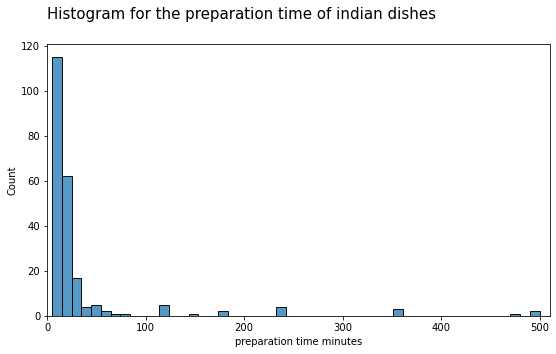

In [4]:
plt.figure(figsize=(9,5))
sns.histplot(indian_food, x="prep_time", bins= 50)
plt.title("Histogram for the preparation time of indian dishes", fontsize=15, loc='left', y=1.07)
plt.xlabel("preparation time minutes")
plt.xlim(0, 510)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


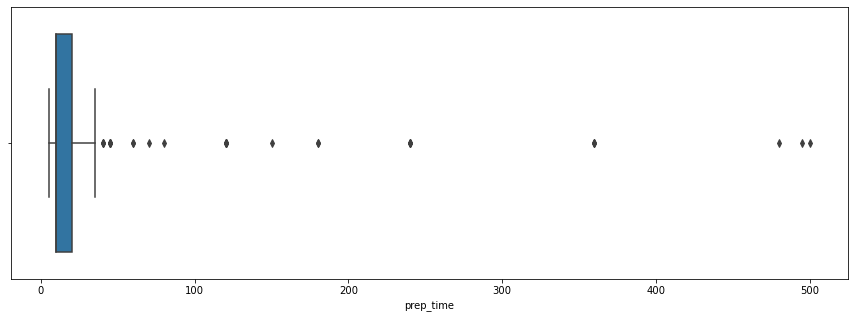

In [5]:
plt.figure(figsize=(15,5))
sns.boxplot(indian_food['prep_time'], data=indian_food)
plt.show()

In [6]:
round(indian_food['prep_time'].describe(), 1)

count    225.0
mean      35.4
std       76.2
min        5.0
25%       10.0
50%       10.0
75%       20.0
max      500.0
Name: prep_time, dtype: float64

## Transformation prep_time

In [7]:
indian_food['log_prep_time'] = np.log10(indian_food['prep_time'])
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr,log_prep_time
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4,1.653213
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3,1.903090


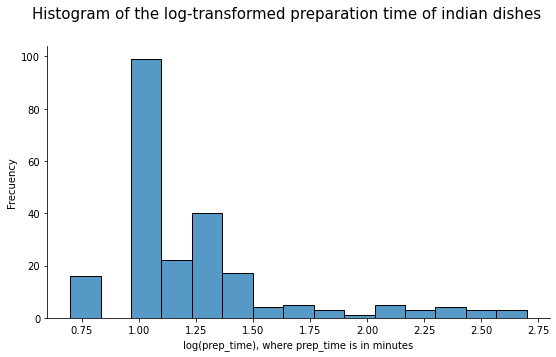

In [42]:
plt.figure(figsize=(9,5)) #figsize=(9,5)

sns.histplot(indian_food, x="log_prep_time", bins= 15) #, bins= 50

plt.title("Histogram of the log-transformed preparation time of indian dishes", fontsize=15, loc='left', y=1.08, x=-0.03)
plt.xlabel("log(prep_time), where prep_time is in minutes")
plt.ylabel("Frecuency")

sns.despine(bottom = False, left = False) # remove frames
#plt.xlim(0, 510)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


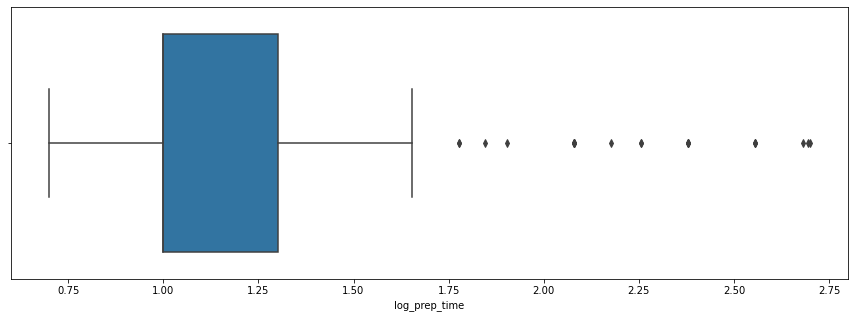

In [10]:
plt.figure(figsize=(15,5))
sns.boxplot(indian_food['log_prep_time'], data=indian_food)
plt.show()

In [11]:
round(indian_food['log_prep_time'].describe(), 1)

count    225.0
mean       1.2
std        0.4
min        0.7
25%        1.0
50%        1.0
75%        1.3
max        2.7
Name: log_prep_time, dtype: float64

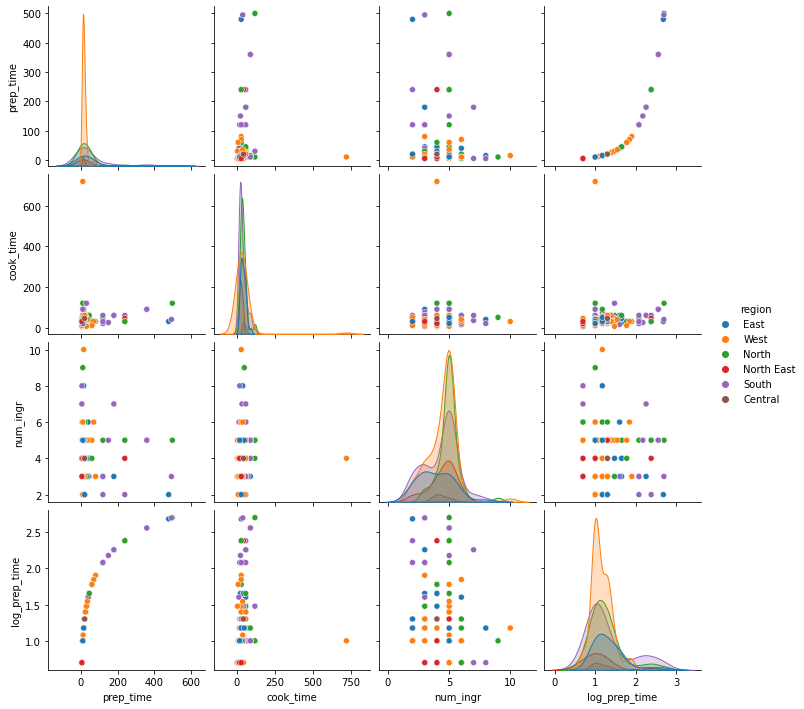

In [12]:
#sns.set_style('darkgrid')
sns.pairplot(indian_food, hue="region")
plt.show()

## Transformation cook_time

In [13]:
indian_food['log_cook_time'] = np.log10(indian_food['cook_time'])
indian_food.head(2)

,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,num_ingr,log_prep_time,log_cook_time
0,Balu shahi,"maida flour, yogurt, oil, sugar",vegetarian,45.0,25.0,sweet,dessert,West Bengal,East,4,1.653213,1.397940
1,Boondi,"gram flour, ghee, sugar",vegetarian,80.0,30.0,sweet,dessert,Rajasthan,West,3,1.903090,1.477121


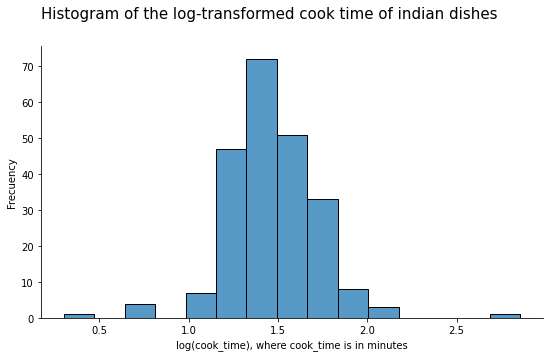

In [48]:
plt.figure(figsize=(9,5))

sns.histplot(indian_food, x="log_cook_time", bins= 15) #, bins= 15

plt.title("Histogram of the log-transformed cook time of indian dishes", fontsize=15, loc='left', y=1.08)
plt.xlabel("log(cook_time), where cook_time is in minutes")
plt.ylabel("Frecuency")

sns.despine(bottom = False, left = False) # remove frames

plt.show()

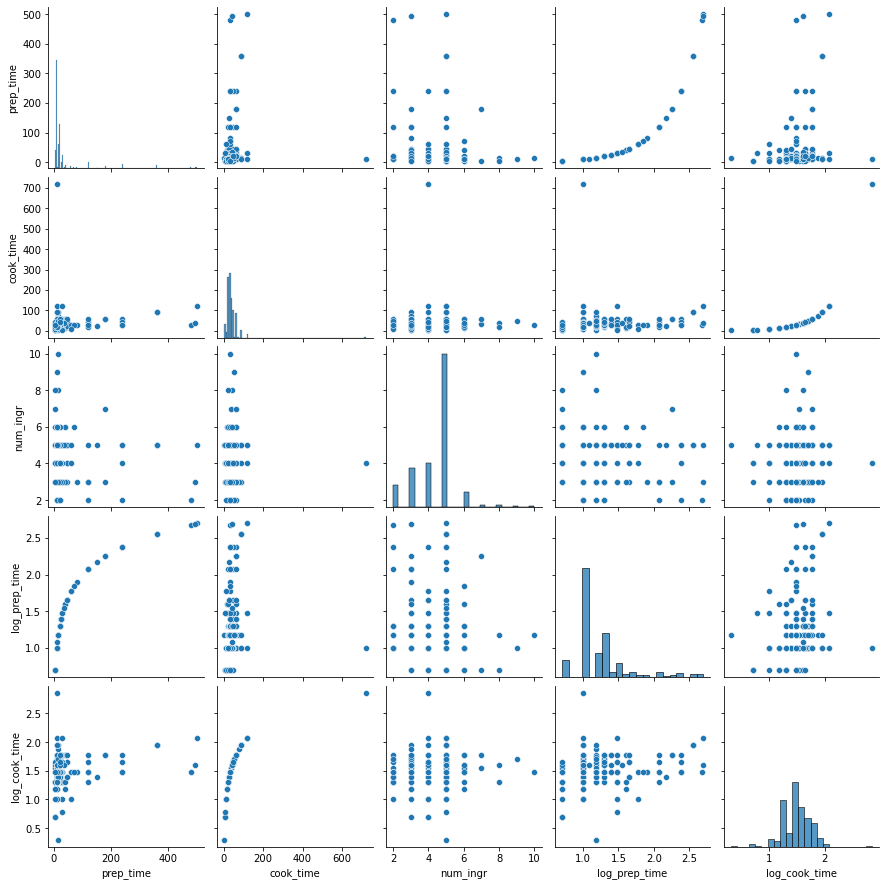

In [14]:
#sns.set_style('darkgrid')
sns.pairplot(indian_food)
plt.show()

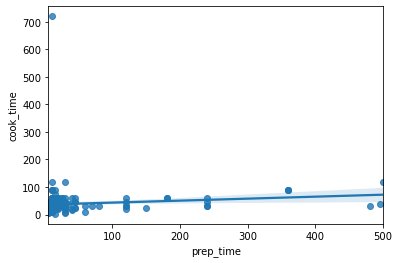

In [15]:
# use the function regplot to make a scatterplot
sns.regplot(x=indian_food["prep_time"], y=indian_food["cook_time"])
plt.show()

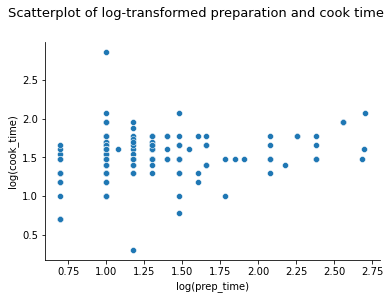

In [54]:
# use the function regplot to make a scatterplot
plt.figure()
sns.scatterplot(x=indian_food["log_prep_time"], y=indian_food["log_cook_time"])

plt.title("Scatterplot of log-transformed preparation and cook time", fontsize=13, y=1.09, x=0.45) #, loc='left'
plt.xlabel("log(prep_time)")
plt.ylabel("log(cook_time)")

sns.despine(bottom = False, left = False) # remove frames

plt.show()

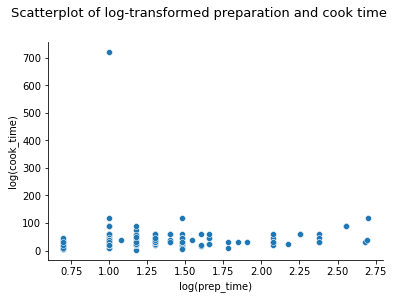

In [55]:
# use the function regplot to make a scatterplot
plt.figure()
sns.scatterplot(x=indian_food["log_prep_time"], y=indian_food["cook_time"])

plt.title("Scatterplot of log-transformed preparation and cook time", fontsize=13, y=1.09, x=0.45) #, loc='left'
plt.xlabel("log(prep_time)")
plt.ylabel("log(cook_time)")

sns.despine(bottom = False, left = False) # remove frames

plt.show()

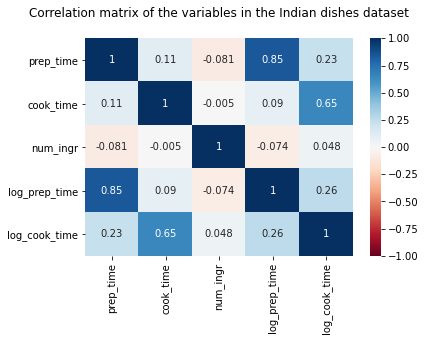

In [17]:
sns.heatmap(round(indian_food.corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=-1, vmax=1,
            annot=True)

plt.title("Correlation matrix of the variables in the Indian dishes dataset", y=1.07)
plt.yticks(rotation=360)

plt.show()

C:\Users\keelji\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


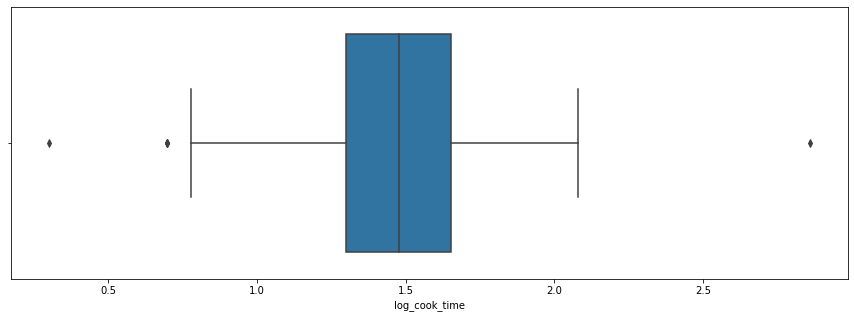

In [18]:
plt.figure(figsize=(15,5))
sns.boxplot(indian_food['log_cook_time'], data=indian_food)
plt.show()

In [19]:
indian_food['cook_time'].describe()

count    227.000000
mean      38.911894
std       49.421711
min        2.000000
25%       20.000000
50%       30.000000
75%       45.000000
max      720.000000
Name: cook_time, dtype: float64

In [20]:
indian_food['log_cook_time'].describe()

count    227.000000
mean       1.499879
std        0.259573
min        0.301030
25%        1.301030
50%        1.477121
75%        1.653213
max        2.857332
Name: log_cook_time, dtype: float64

In [21]:
logs = indian_food[['cook_time', 'prep_time', 'log_cook_time', 'log_prep_time']]

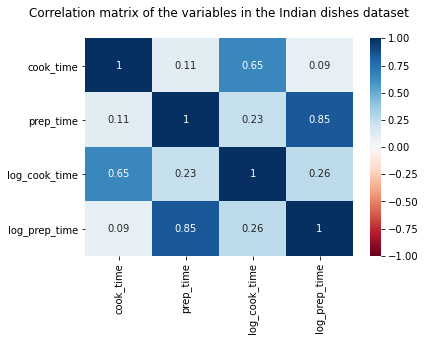

In [22]:
sns.heatmap(round(logs.corr(), 3), 
            cmap='RdBu', 
            center=0, 
            vmin=-1, vmax=1,
            annot=True)

plt.title("Correlation matrix of the variables in the Indian dishes dataset", y=1.07)
plt.yticks(rotation=360)

plt.show()